In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-deaths-per-100-000-population/suicide-lghc-indicator-21.csv


In [2]:
sd=pd.read_csv("/kaggle/input/suicide-deaths-per-100-000-population/suicide-lghc-indicator-21.csv")
sd

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067
1,Suicide,CALIFORNIA,2000,Sex,Male,2431,16920000,14.370,15.890
2,Suicide,CALIFORNIA,2000,Sex,Total,3113,34000000,9.156,9.564
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005
4,Suicide,CALIFORNIA,2001,Sex,Male,2571,17170000,14.970,16.410
...,...,...,...,...,...,...,...,...,...
1399,Suicide,Butte,2015-2017,Sex,Total,128,676000,18.940,18.310
1400,Suicide,Santa Cruz,2015-2017,Sex,Total,136,829300,16.400,15.740
1401,Suicide,Sonoma,2015-2017,Sex,Total,205,1512000,13.550,12.190
1402,Suicide,Trinity,2015-2017,Sex,Total,16,40490,39.510,43.870


In [3]:
missing_values = sd.isnull().sum()
print(missing_values)

Indicator            0
Geography            0
Year                 0
Strata               0
Strata Name          0
Numerator            0
Denominator          0
Rate                 0
Age Adjusted Rate    0
dtype: int64


In [4]:
sd = sd.drop(['Strata','Age Adjusted Rate'], axis=1)
sd.head(2)

,Indicator,Geography,Year,Strata Name,Numerator,Denominator,Rate
0,Suicide,CALIFORNIA,2000,Female,682,17080000,3.993
1,Suicide,CALIFORNIA,2000,Male,2431,16920000,14.370


In [5]:
sd.rename(columns={'Geography': 'Country','Strata Name':'Gender','Numerator':'Suicide_Case','Denominator':'Population','Rate':'Suicide_Rate'},inplace=True)


In [6]:
sd.head(2)

,Indicator,Country,Year,Gender,Suicide_Case,Population,Suicide_Rate
0,Suicide,CALIFORNIA,2000,Female,682,17080000,3.993
1,Suicide,CALIFORNIA,2000,Male,2431,16920000,14.370


In [7]:
# Extract the starting year from the range
sd['Year'] = sd['Year'].str.split('-').str[0] 
# Convert to datetime
sd['Year'] = pd.to_datetime(sd['Year']) 

In [8]:
print(sd['Year'])

0      2000-01-01
1      2000-01-01
2      2000-01-01
3      2001-01-01
4      2001-01-01
          ...    
1399   2015-01-01
1400   2015-01-01
1401   2015-01-01
1402   2015-01-01
1403   2015-01-01
Name: Year, Length: 1404, dtype: datetime64[ns]


In [9]:
sd = sd.drop_duplicates()
sd.head(2)

,Indicator,Country,Year,Gender,Suicide_Case,Population,Suicide_Rate
0,Suicide,CALIFORNIA,2000-01-01,Female,682,17080000,3.993
1,Suicide,CALIFORNIA,2000-01-01,Male,2431,16920000,14.370


In [10]:
sd.info

<bound method DataFrame.info of      Indicator     Country       Year  Gender  Suicide_Case  Population  \
0      Suicide  CALIFORNIA 2000-01-01  Female           682    17080000   
1      Suicide  CALIFORNIA 2000-01-01    Male          2431    16920000   
2      Suicide  CALIFORNIA 2000-01-01   Total          3113    34000000   
3      Suicide  CALIFORNIA 2001-01-01  Female           685    17340000   
4      Suicide  CALIFORNIA 2001-01-01    Male          2571    17170000   
...        ...         ...        ...     ...           ...         ...   
1399   Suicide       Butte 2015-01-01   Total           128      676000   
1400   Suicide  Santa Cruz 2015-01-01   Total           136      829300   
1401   Suicide      Sonoma 2015-01-01   Total           205     1512000   
1402   Suicide     Trinity 2015-01-01   Total            16       40490   
1403   Suicide      Sutter 2015-01-01   Total            42      294800   

      Suicide_Rate  
0            3.993  
1           14.370  
2   

In [11]:
sd.describe()

,Suicide_Case,Population,Suicide_Rate
count,1404.000000,1.404000e+03,1404.000000
mean,369.424501,3.740042e+06,12.699789
std,1162.425801,1.089204e+07,8.033526
min,11.000000,2.697000e+04,2.088000
25%,31.000000,2.998250e+05,6.022000
50%,75.500000,6.661000e+05,11.040000
75%,181.750000,2.083750e+06,17.022500
max,12560.000000,1.181000e+08,48.890000


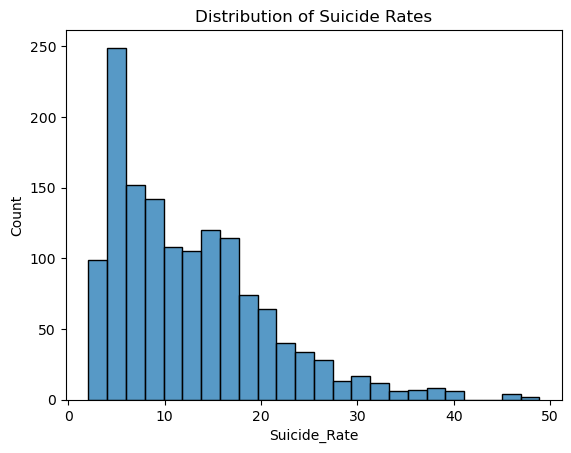

In [12]:
# Data visualization
sns.histplot(sd['Suicide_Rate'])
plt.xlabel('Suicide_Rate')
plt.ylabel('Count')
plt.title('Distribution of Suicide Rates')
plt.show()


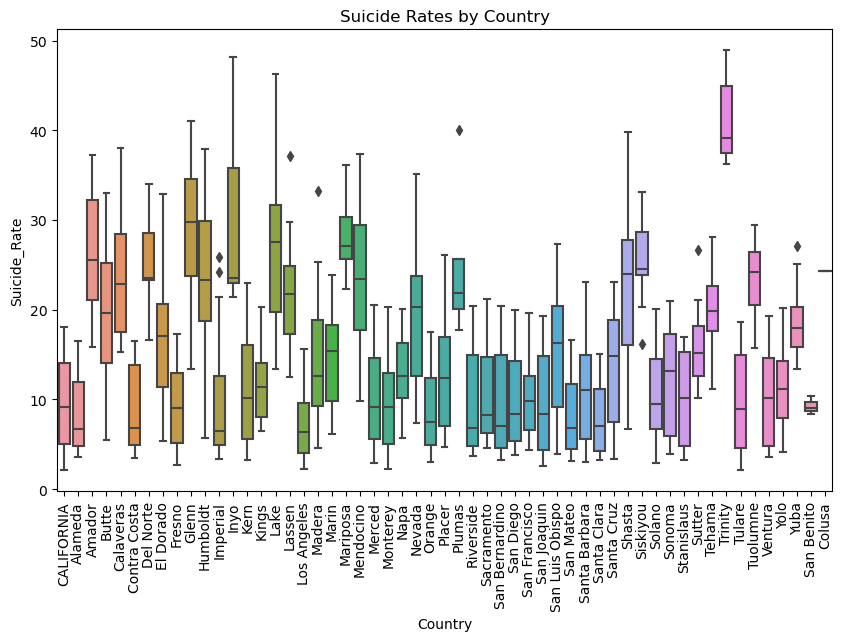

In [13]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Country', y='Suicide_Rate', data=sd)
plt.xlabel('Country')
plt.ylabel('Suicide_Rate')
plt.title('Suicide Rates by Country')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Step 4: Missing values
missing_values = sd.isnull().sum()
print(missing_values)

Indicator       0
Country         0
Year            0
Gender          0
Suicide_Case    0
Population      0
Suicide_Rate    0
dtype: int64


In [15]:
region_counts = sd['Country'].value_counts()
print(region_counts)

CALIFORNIA         114
Los Angeles         47
San Diego           47
Sacramento          45
Riverside           44
Alameda             43
Contra Costa        42
San Bernardino      41
San Francisco       41
Santa Clara         40
Orange              40
Solano              37
Fresno              36
San Joaquin         35
San Mateo           35
Kern                33
Ventura             32
Santa Barbara       30
Stanislaus          30
Monterey            30
Sonoma              29
San Luis Obispo     27
Santa Cruz          27
Tulare              26
Merced              26
Placer              25
Marin               25
Shasta              24
Butte               24
Humboldt            24
Nevada              22
Madera              21
El Dorado           20
Yolo                19
Imperial            19
Mendocino           19
Napa                18
Lake                17
Siskiyou            14
Kings               13
Tehama              13
Sutter              12
Calaveras           11
Tuolumne   

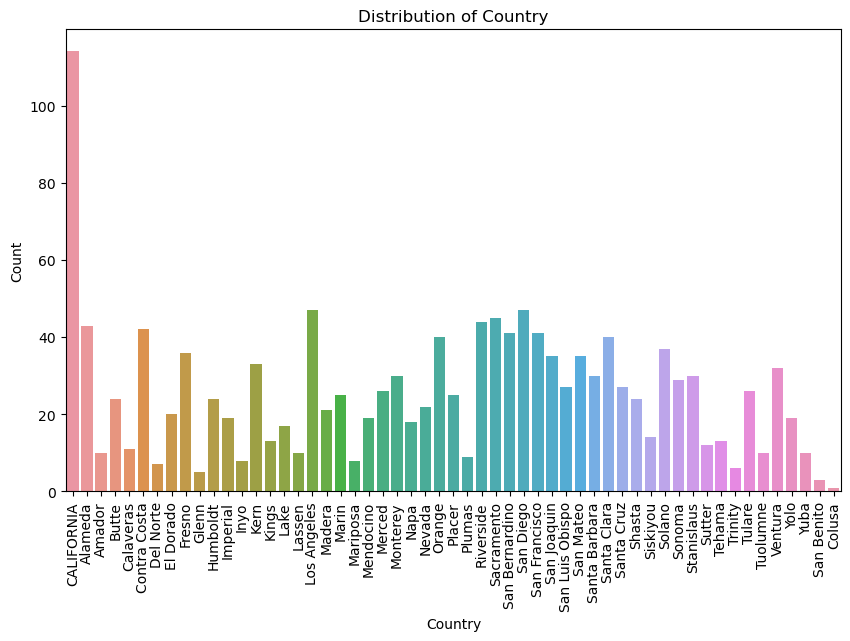

In [16]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Country', data=sd)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.xticks(rotation=90, )
plt.show()

In [17]:
sd.sort_index(inplace=True)

5. Plot the time series data:

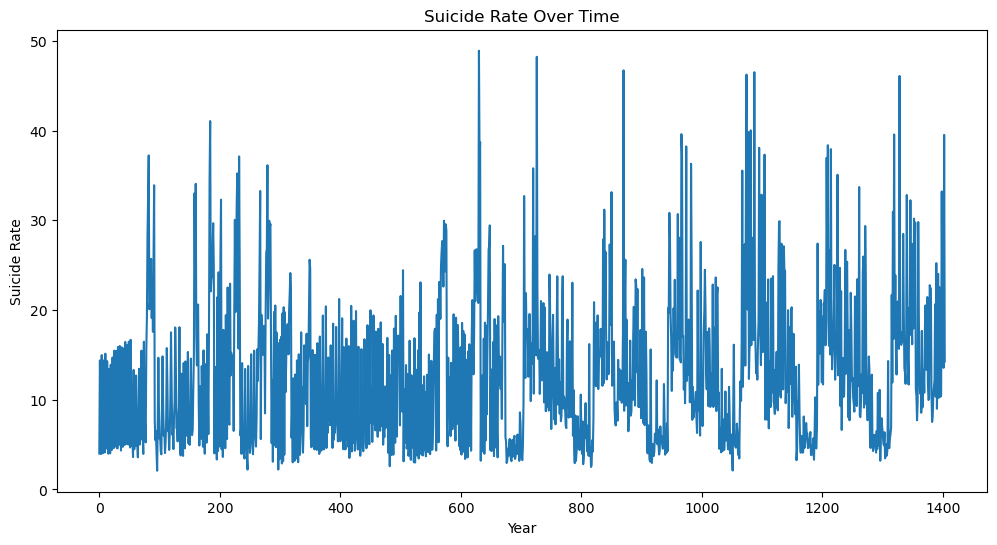

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(sd.index, sd['Suicide_Rate'])
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate Over Time')
plt.show()

# Feature engineering:

1. Calculating rates: 

In [19]:
sd['Suicide_Rate'] = (sd['Suicide_Case'] / sd['Population']) * 100000
sd['Suicide_Rate']

0        3.992974
1       14.367612
2        9.155882
3        3.950404
4       14.973791
          ...    
1399    18.934911
1400    16.399373
1401    13.558201
1402    39.515930
1403    14.246947
Name: Suicide_Rate, Length: 1404, dtype: float64

2.Aggregating data:: 

In [20]:
country_stats = sd.groupby('Country').agg({'Suicide_Case': 'sum', 'Suicide_Rate': 'mean'}).reset_index()
country_stats 

,Country,Suicide_Case,Suicide_Rate
0,Alameda,6991,8.077811
1,Amador,269,26.288339
2,Butte,2038,18.799903
3,CALIFORNIA,328769,9.327279
4,Calaveras,305,24.316808
5,Colusa,16,24.282896
6,Contra Costa,5539,8.880032
7,Del Norte,123,25.401882
8,El Dorado,1255,16.529939
9,Fresno,4312,9.340067


In [21]:
print("Number of rows:", sd.shape[0])
print("Number of columns:", sd.shape[1])


Number of rows: 1404
Number of columns: 7


In [22]:
print("Column names:", sd.columns.tolist())
print("Data types:", sd.dtypes)


Column names: ['Indicator', 'Country', 'Year', 'Gender', 'Suicide_Case', 'Population', 'Suicide_Rate']
Data types: Indicator               object
Country                 object
Year            datetime64[ns]
Gender                  object
Suicide_Case             int64
Population               int64
Suicide_Rate           float64
dtype: object


In [23]:
missing_values = sd.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Indicator       0
Country         0
Year            0
Gender          0
Suicide_Case    0
Population      0
Suicide_Rate    0
dtype: int64


In [24]:
numeric_columns = sd.select_dtypes(include=[np.number])
summary_stats = numeric_columns.describe()
print("Summary statistics:\n", summary_stats)


Summary statistics:
        Suicide_Case    Population  Suicide_Rate
count   1404.000000  1.404000e+03   1404.000000
mean     369.424501  3.740042e+06     12.699777
std     1162.425801  1.089204e+07      8.033543
min       11.000000  2.697000e+04      2.087576
25%       31.000000  2.998250e+05      6.022377
50%       75.500000  6.661000e+05     11.042211
75%      181.750000  2.083750e+06     17.021821
max    12560.000000  1.181000e+08     48.878666


In [25]:
categorical_columns = sd.select_dtypes(include=[np.object])
for column in categorical_columns:
    unique_values = sd[column].unique()
    print("Unique values for", column, ":", unique_values)


Unique values for Indicator : ['Suicide']
Unique values for Country : ['CALIFORNIA' 'Alameda' 'Amador' 'Butte' 'Calaveras' 'Contra Costa'
 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo'
 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera' 'Marin' 'Mariposa'
 'Mendocino' 'Merced' 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer'
 'Plumas' 'Riverside' 'Sacramento' 'San Bernardino' 'San Diego'
 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz' 'Shasta' 'Siskiyou' 'Solano'
 'Sonoma' 'Stanislaus' 'Sutter' 'Tehama' 'Trinity' 'Tulare' 'Tuolumne'
 'Ventura' 'Yolo' 'Yuba' 'San Benito' 'Colusa']
Unique values for Gender : ['Female' 'Male' 'Total' 'Asian-NH' 'Black-NH' 'Hisp' 'White-NH'
 'Multi-NH' 'AIAN-NH' 'NHPI-NH']


/tmp/ipykernel_20/3480145063.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = sd.select_dtypes(include=[np.object])


 # Histograms and Bar Plots:
    Visualize the distribution of numerical variables or the frequency counts of categorical variables.

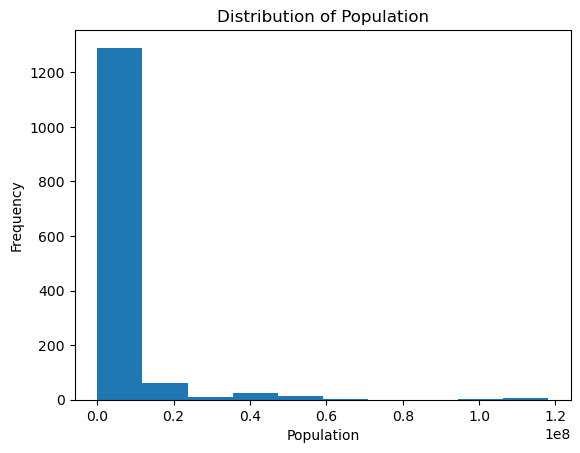

In [26]:
# Histogram
plt.hist(sd['Population'])
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')
plt.show()

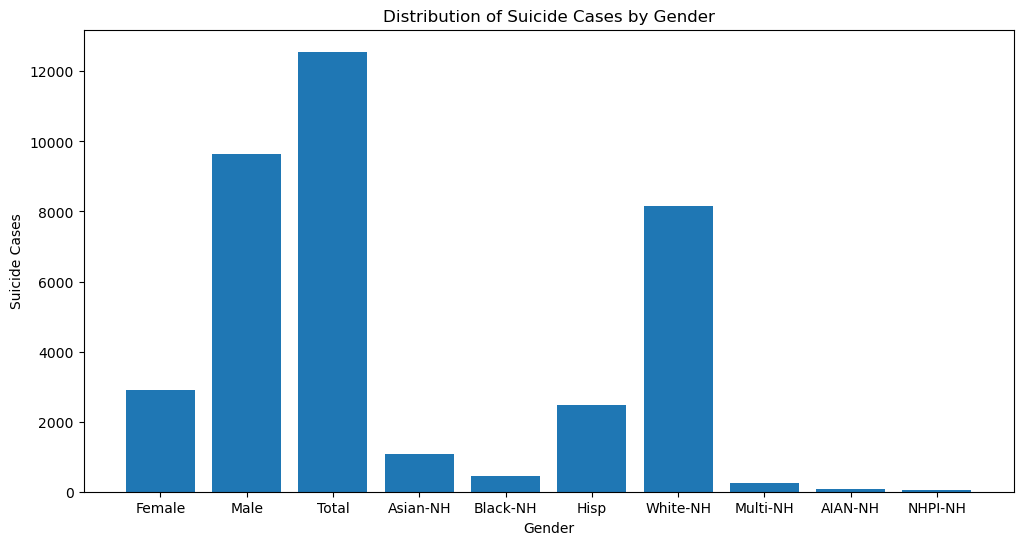

In [27]:
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(sd['Gender'], sd['Suicide_Case'])
plt.xlabel('Gender')
plt.ylabel('Suicide Cases')
plt.title('Distribution of Suicide Cases by Gender')
plt.show()


# Scatter Plots:
    Explore the relationship between two numerical variables and identify any patterns or correlations.

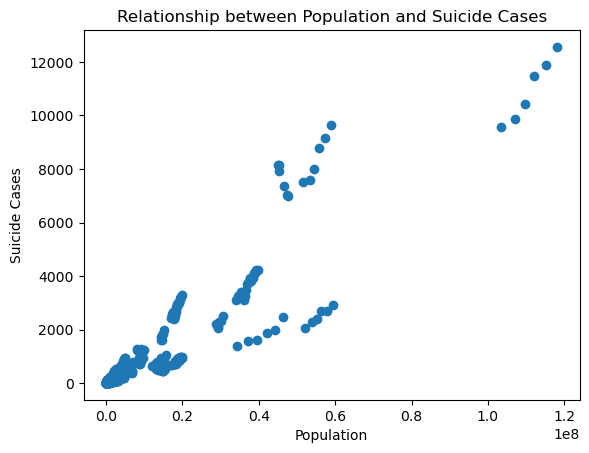

In [28]:
plt.scatter(sd['Population'], sd['Suicide_Case'])
plt.xlabel('Population')
plt.ylabel('Suicide Cases')
plt.title('Relationship between Population and Suicide Cases')
plt.show()


# Box Plots: 
    Analyze the distribution of a numerical variable across different categories or groups.

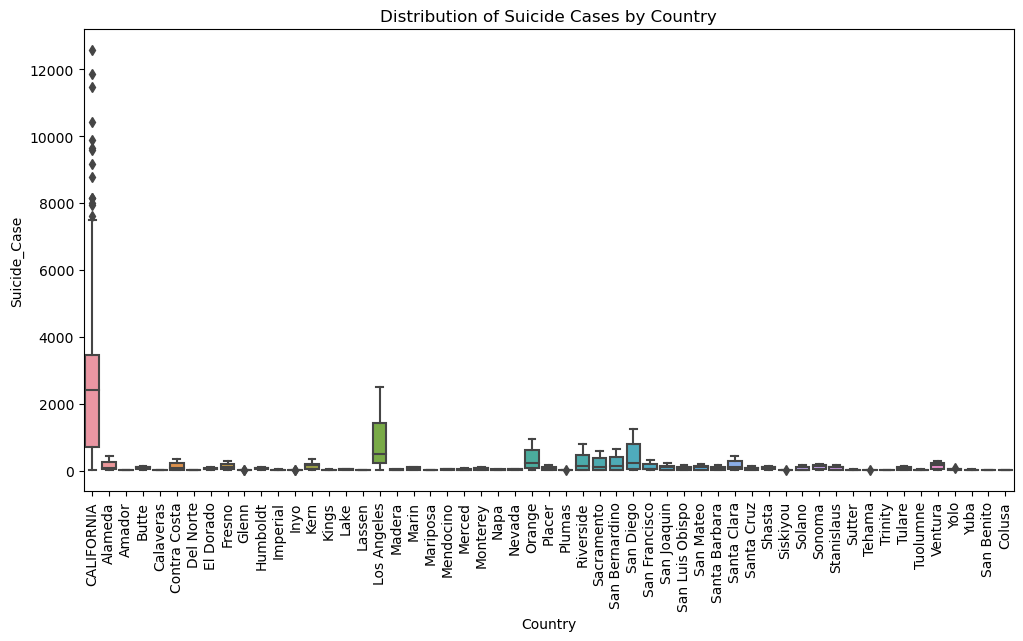

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Suicide_Case', data=sd)
plt.xlabel('Country')
plt.ylabel('Suicide_Case')
plt.title('Distribution of Suicide Cases by Country')
plt.xticks(rotation=90)
plt.show()


# Line Plots: 
    Visualize trends or patterns over time if the dataset includes a time-related variable.

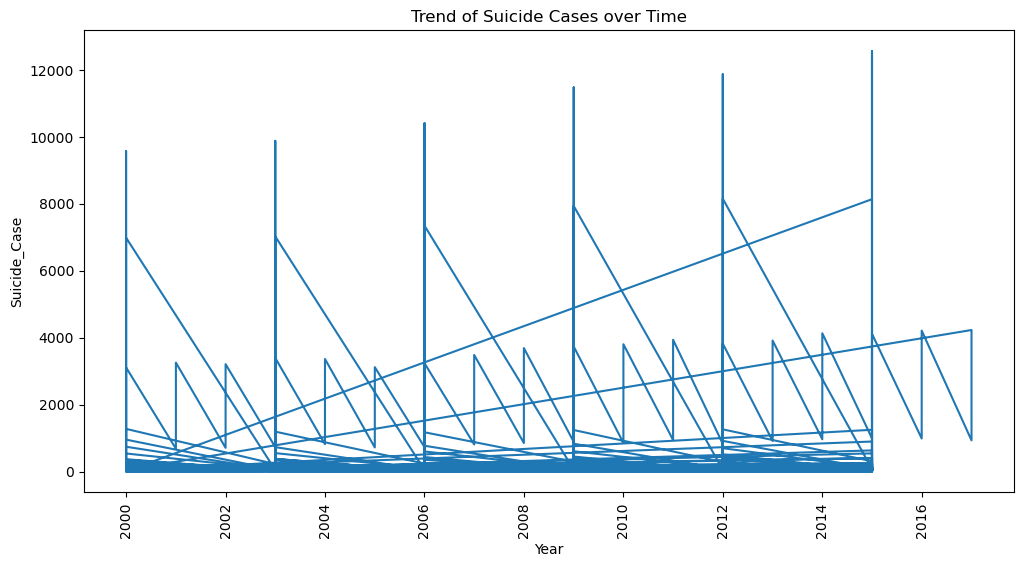

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(sd['Year'], sd['Suicide_Case'])
plt.xlabel('Year')
plt.ylabel('Suicide_Case')
plt.title('Trend of Suicide Cases over Time')
plt.xticks(rotation=90)
plt.show()


# Heatmaps: 
    Display the correlation matrix between numerical variables to identify relationships and dependencies.

/tmp/ipykernel_20/1195435022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sd.corr(), annot=True, cmap='coolwarm')


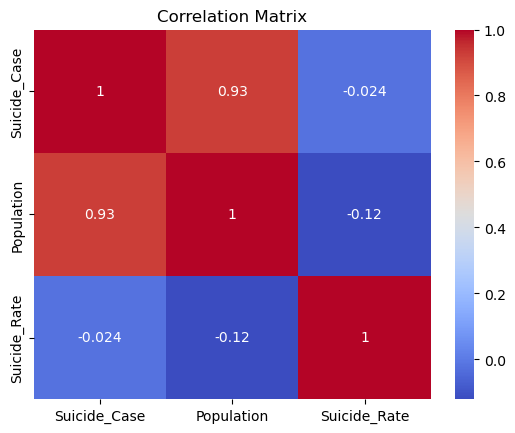

In [31]:
sns.heatmap(sd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Gender-based analysis:

In [32]:
# Group the data by gender and count the number of suicide cases
gender_counts = sd.groupby('Gender')['Suicide_Case'].count()
gender_counts

Gender
AIAN-NH       6
Asian-NH     88
Black-NH     61
Female      226
Hisp        153
Male        229
Multi-NH     29
NHPI-NH       6
Total       329
White-NH    277
Name: Suicide_Case, dtype: int64

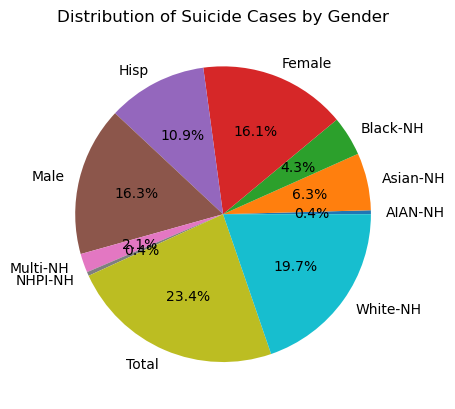

In [33]:
# Alternatively, you can create a pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Suicide Cases by Gender')
plt.show()

In [34]:
# Compare the suicide rates between genders
gender_suicide_rates = sd.groupby('Gender')['Suicide_Rate'].mean()

gender_suicide_rates

Gender
AIAN-NH     10.559678
Asian-NH     6.581911
Black-NH     6.932304
Female       5.808980
Hisp         4.970282
Male        19.323321
Multi-NH     7.046303
NHPI-NH      9.036305
Total       14.180519
White-NH    19.287997
Name: Suicide_Rate, dtype: float64

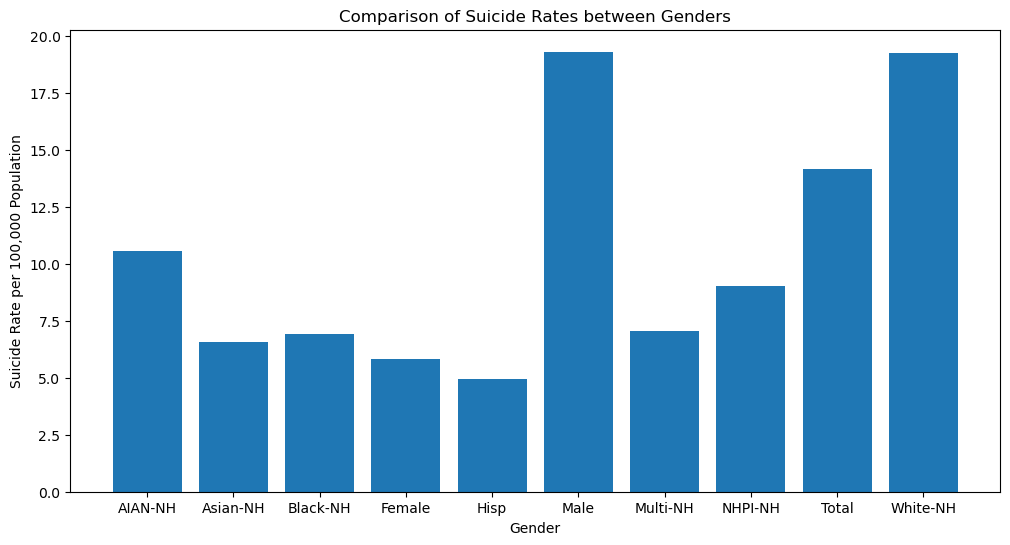

In [35]:
# Create a bar plot to visualize the comparison of suicide rates between genders
plt.figure(figsize=(12, 6))
plt.bar(gender_suicide_rates.index, gender_suicide_rates.values)
plt.xlabel('Gender')
plt.ylabel('Suicide Rate per 100,000 Population')
plt.title('Comparison of Suicide Rates between Genders')
plt.show()


In [36]:

# Group the data by gender and region/country and count the number of suicide cases
grouped_data = sd.groupby(['Gender', 'Country'])['Suicide_Case'].count().unstack()


grouped_data

Country,Alameda,Amador,Butte,CALIFORNIA,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
Gender,,,,,,,,,,,,,,,,,,,,,
AIAN-NH,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asian-NH,6.0,NaN,NaN,6.0,NaN,NaN,5.0,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Black-NH,6.0,NaN,NaN,6.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,6.0,NaN,6.0,24.0,1.0,NaN,6.0,NaN,5.0,6.0,...,6.0,6.0,NaN,1.0,NaN,4.0,NaN,6.0,3.0,NaN
Hisp,6.0,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN,6.0,...,5.0,6.0,NaN,NaN,NaN,6.0,NaN,6.0,1.0,NaN
Male,6.0,NaN,6.0,24.0,1.0,NaN,6.0,NaN,5.0,6.0,...,6.0,6.0,NaN,1.0,NaN,4.0,NaN,6.0,3.0,NaN
Multi-NH,1.0,NaN,NaN,6.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NHPI-NH,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,6.0,6.0,6.0,24.0,6.0,1.0,6.0,4.0,6.0,6.0,...,6.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,6.0,6.0


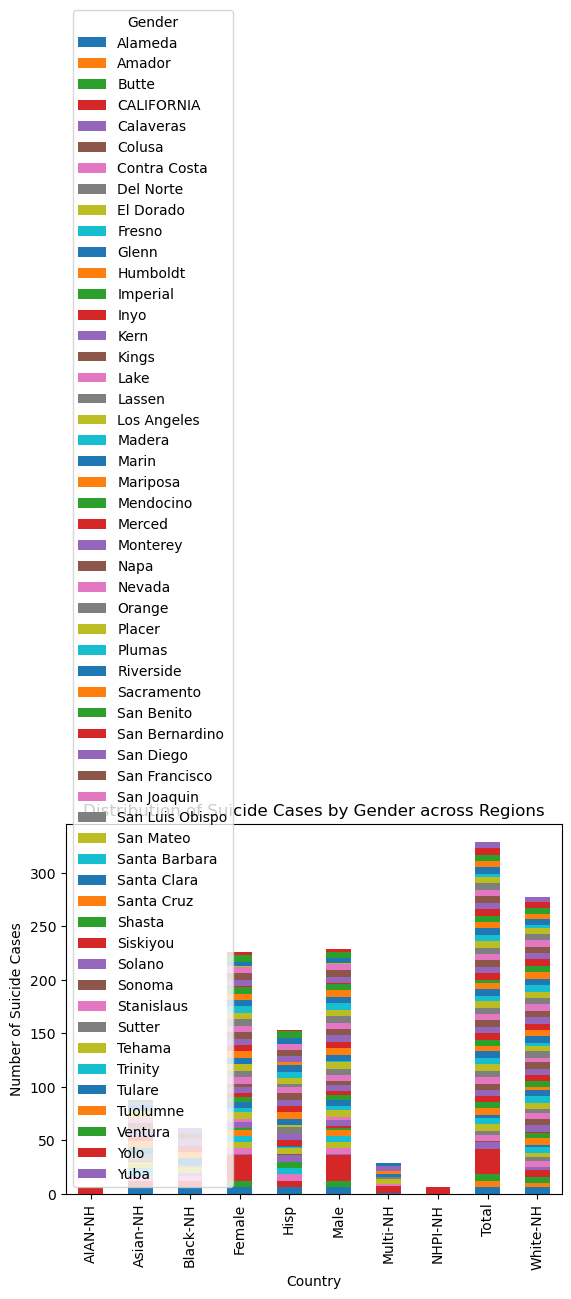

In [37]:
# Create a stacked bar plot to visualize the distribution of suicide cases by gender and region
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Number of Suicide Cases')
plt.title('Distribution of Suicide Cases by Gender across Regions')
plt.legend(title='Gender')
plt.show()

# THANK YOU